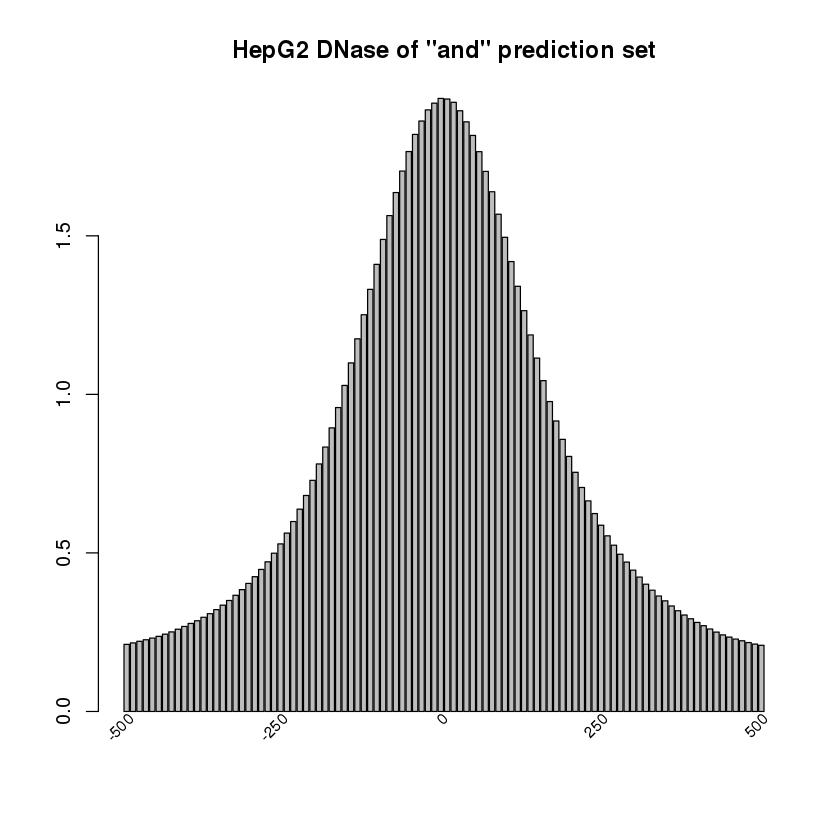

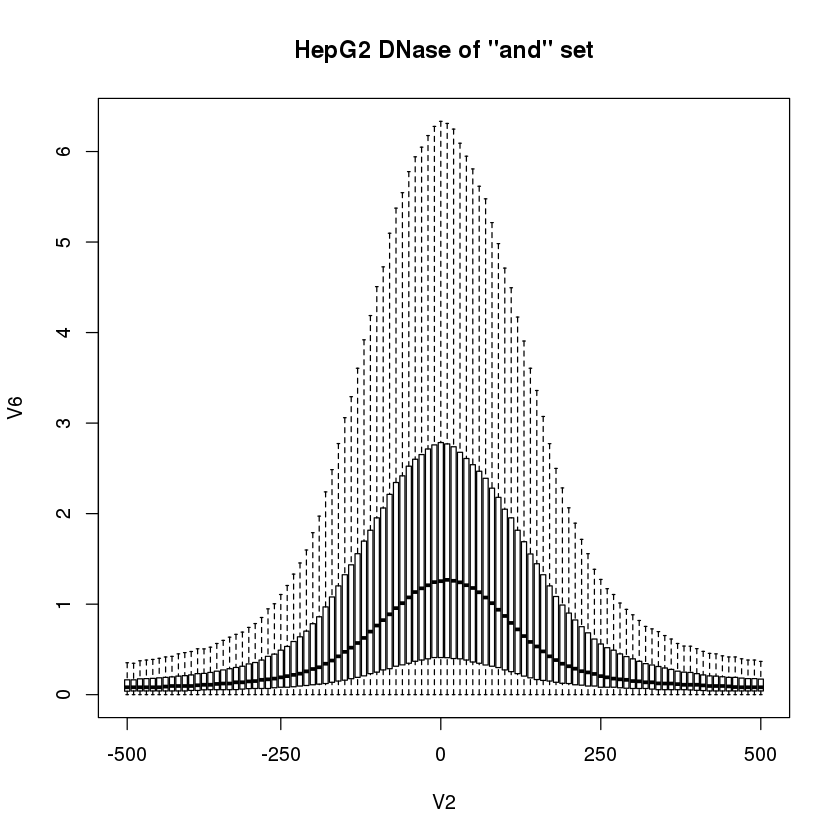

In [1]:
rm(list = ls())
library(data.table)
#library(reshape)
library(ggplot2)

pred <- fread("classifier.and_set.DNase+ChIP-seq.H3K27ac.HepG2.HepG2.tsv")
pred$V1 <- as.numeric(pred$V1)
# summary(pred)

pos <- fread("/gpfs/ysm/scratch60/zc264/ChromVar/enhancer-prediction/encode/datasets/DNase_and_H3K27ac/result_bed/HepG2.DNase.positive.separated.tab")
neg <- fread("/gpfs/ysm/scratch60/zc264/ChromVar/enhancer-prediction/encode/datasets/DNase_and_H3K27ac/result_bed/HepG2.DNase.negative.separated.tab")

neg_idx <- c()
# seq(1, nrow(neg), 1000)
for (i in seq(1, nrow(neg), 1000)){
    neg_idx <- c(neg_idx, seq(i,i+99))
}
# length(neg_idx)
neg <- neg[neg_idx, ]
neg$V1 <- neg$V1 / 10
# nrow(pos)
# nrow(neg)

# increment the negatives for appending
# head(neg$V1[100:200])
new_pos_idx <- pos$V1 + 1
new_neg_idx <- neg$V1 + 1 + (nrow(pos) / 100)
# print(new_neg_idx[101])
# head(new_pos_idx)
# tail(new_pos_idx)
# head(new_neg_idx)
# tail(new_neg_idx)
new_idx <- c(new_pos_idx, new_neg_idx)
# length(new_idx)
# max(new_idx)
DNase_temp <- rbind(pos[,c(2,6)], neg[,c(2,6)])
# nrow(DNase_temp)
DNase_peaks <- cbind(new_idx, DNase_temp)
# summary(DNase_peaks)
# head(DNase_peaks)
# unique(DNase_peaks$new_idx)

pred_pos_idx <- which(pred > 0.5)
# pred_pos
# print(pred_pos_idx)
pred_pos <- DNase_peaks[which(new_idx %in% pred_pos_idx),]
pred_pos.agg <- aggregate(pred_pos, by=list(pred_pos$V2), FUN=mean)

bp <- barplot(pred_pos.agg$V6, main="HepG2 DNase of \"and\" prediction set")
text(x=bp[c(1, 25, 50, 75, 100)], y=0, adj=c(1, 1), as.character(c(-500, -250, 0, 250, 500)), cex=0.8, srt=45, xpd=TRUE)
bp <- boxplot(V6~V2, data=pred_pos, outline=FALSE, xaxt='n', main="HepG2 DNase of \"and\" set")
axis(1, las=1, at=c(1, 25, 50, 75, 100), labels=c(-500, -250, 0, 250, 500))

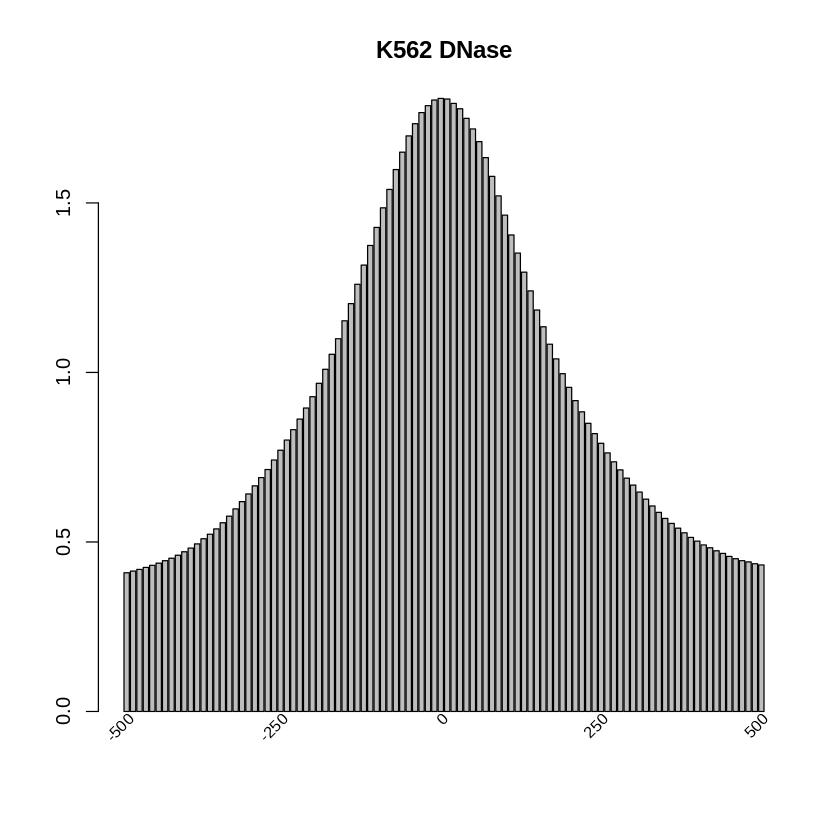

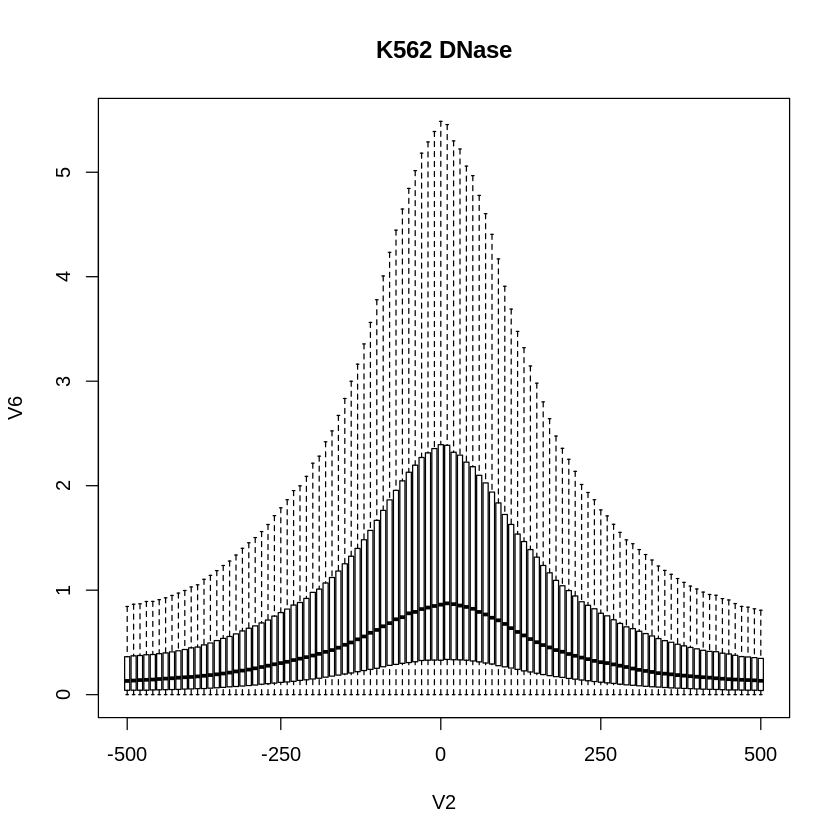

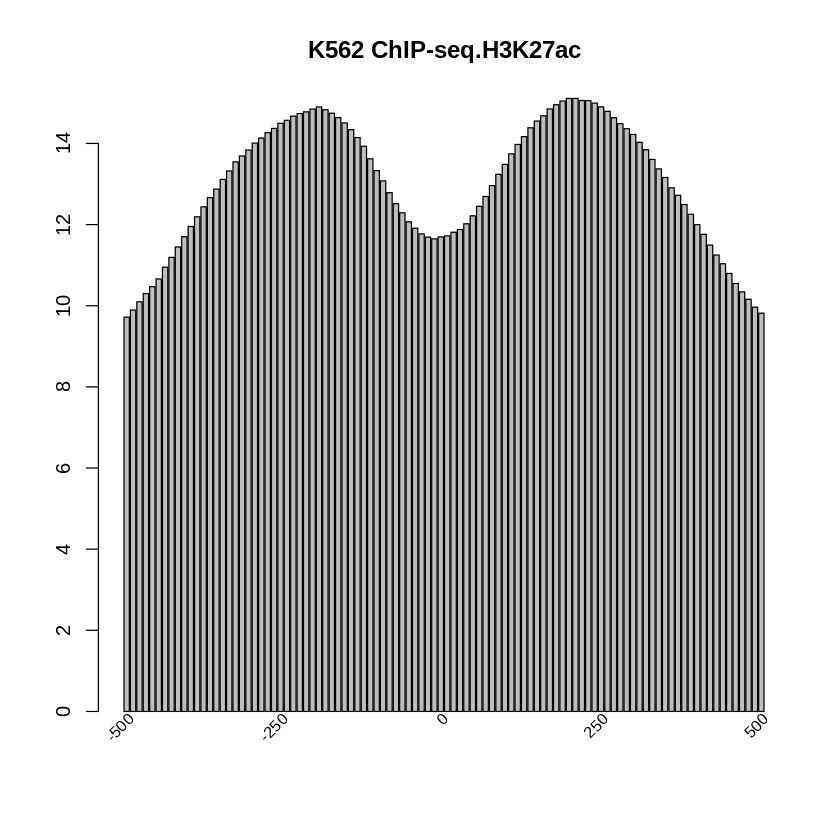

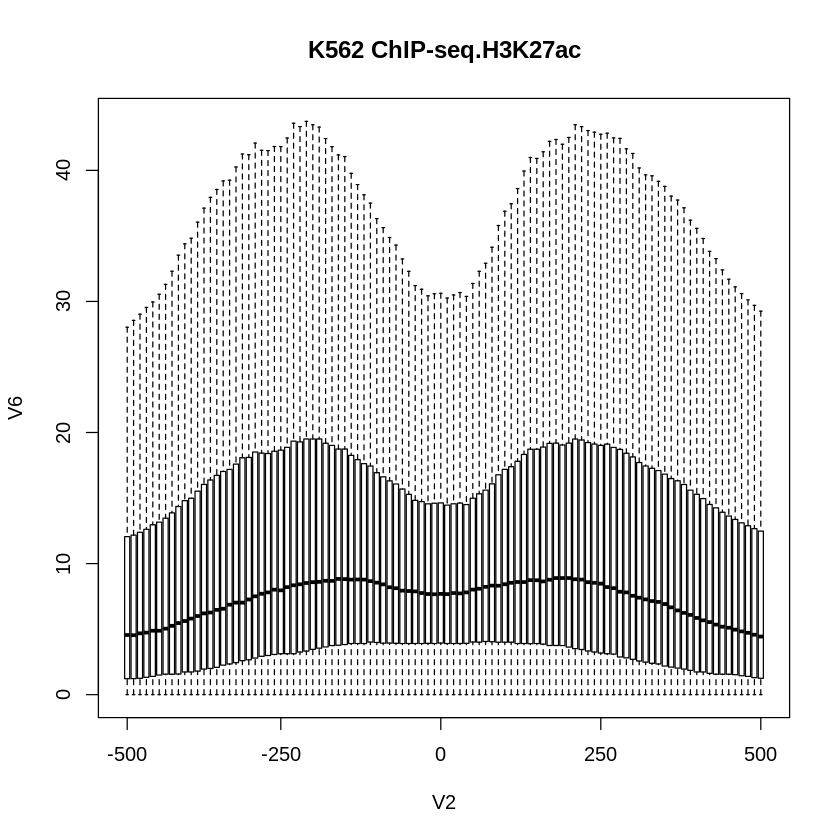

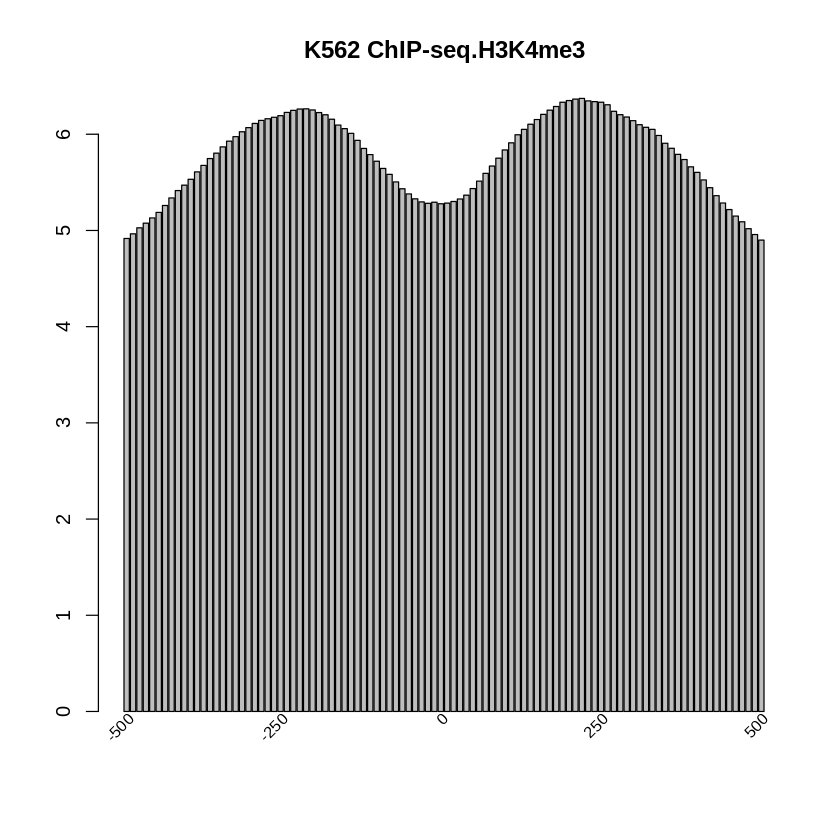

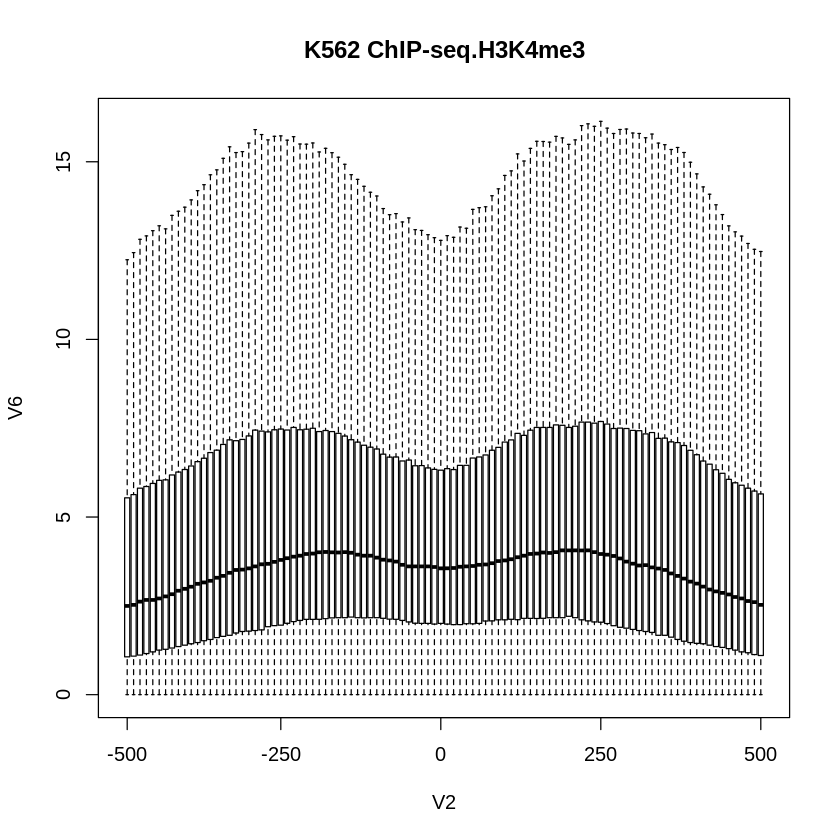

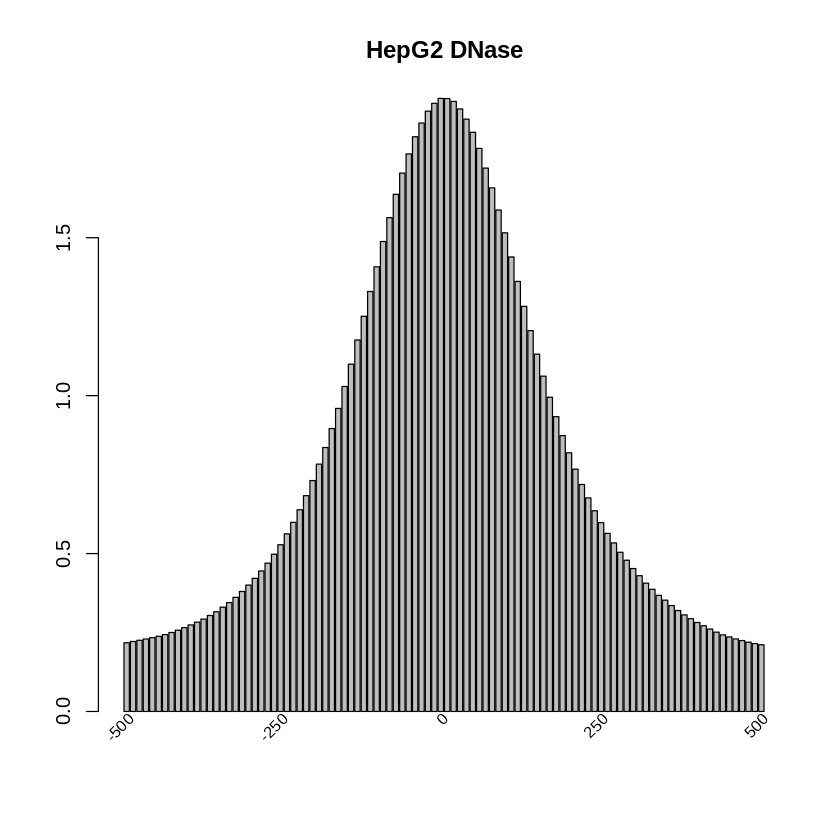

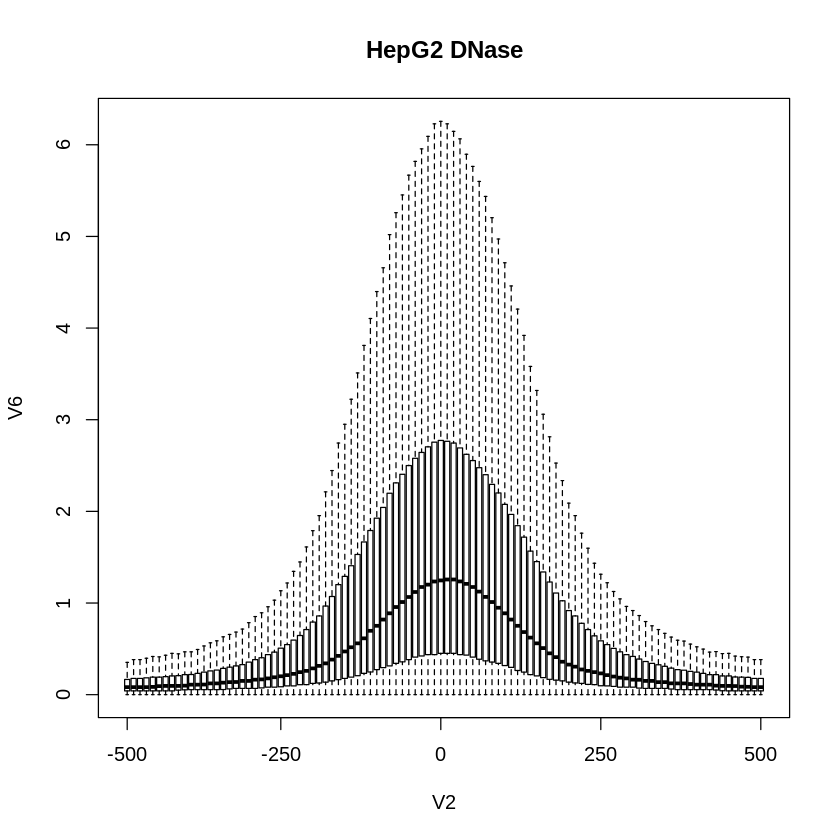

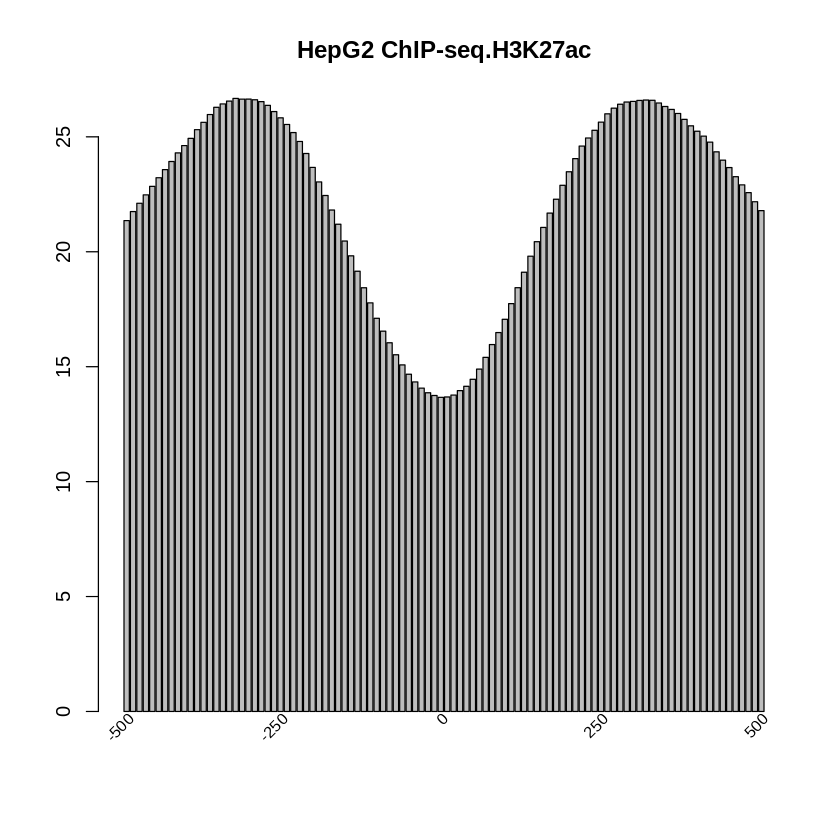

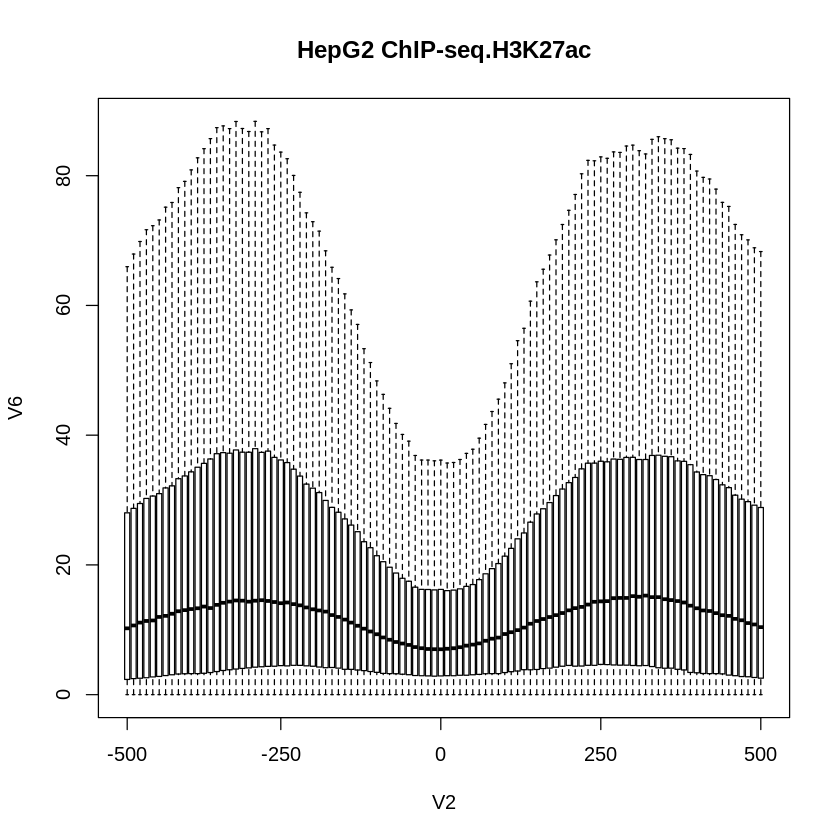

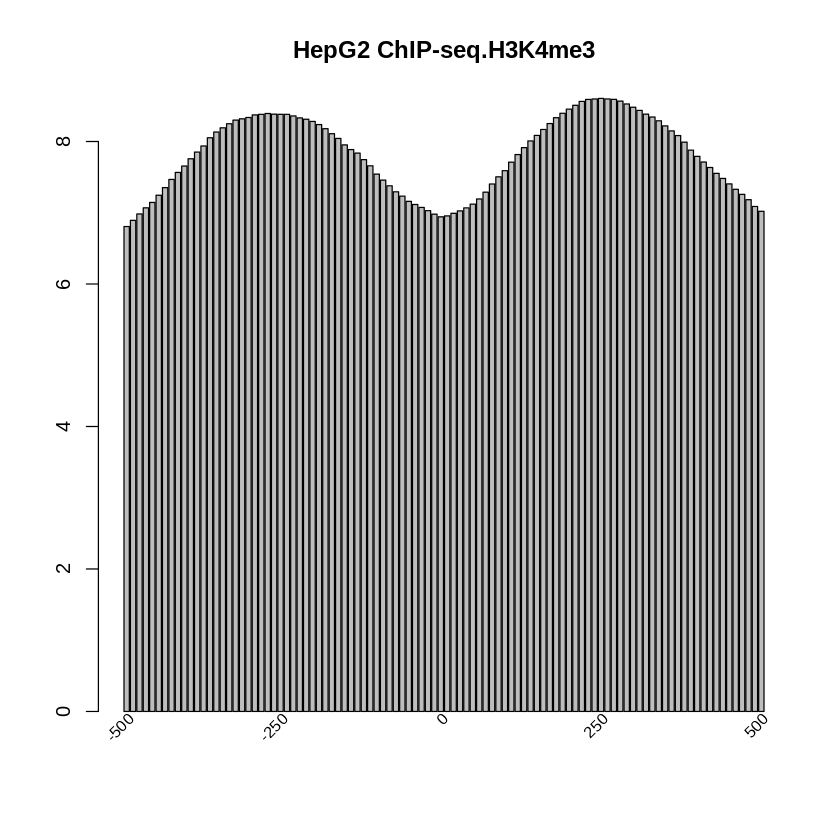

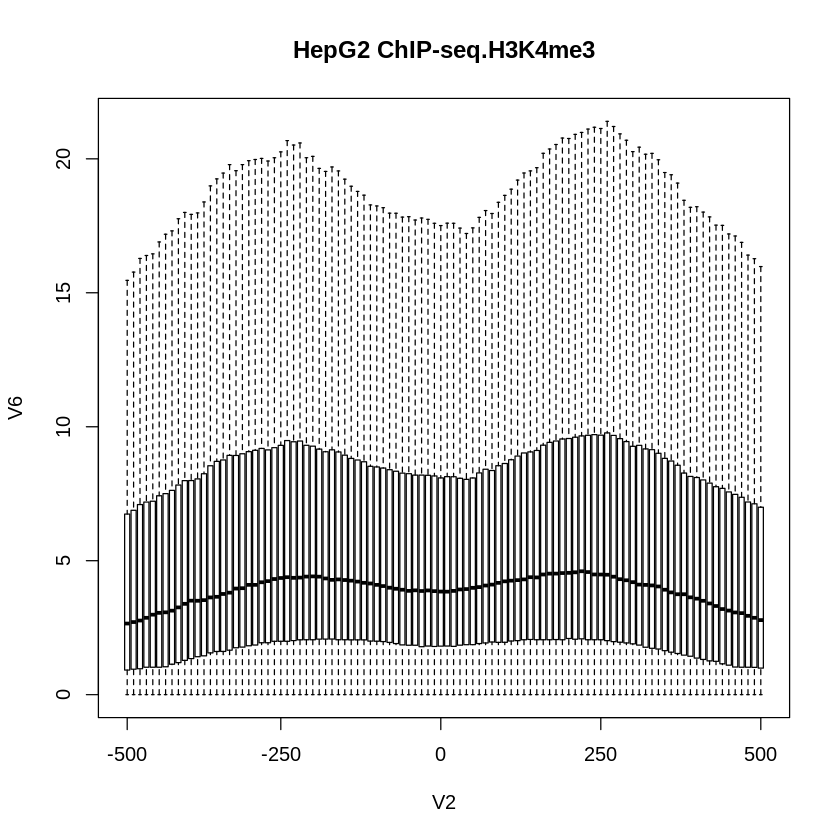

In [5]:
rm(list = ls())
library(data.table)
#library(reshape)
library(ggplot2)

cell_list <- c("K562", "HepG2")
names_list <- c("DNaseInNegatives_and_H3K27ac+H3K4me3.dtss_gc_DHSsig")
assay_list <- c("DNase", "ChIP-seq.H3K27ac", "ChIP-seq.H3K4me3")
for (c in cell_list) {
    for (n in names_list) {
        for (a in assay_list){
            pred <- fread(paste0("classifier.se.", n, ".DNase+ChIP-seq.H3K27ac+ChIP-seq.H3K4me3.", c, ".", c, ".tsv"))
            pred$V1 <- as.numeric(pred$V1)
            # summary(pred)

            pos <- fread(paste0("/gpfs/ysm/scratch60/zc264/ChromVar/enhancer-prediction/encode/datasets/DNaseInNegatives_and_H3K27ac+H3K4me3.dtss_gc_DHSsig/result_bed/", c, ".", a, ".", "positive.separated.tab"))
            neg <- fread(paste0("/gpfs/ysm/scratch60/zc264/ChromVar/enhancer-prediction/encode/datasets/DNaseInNegatives_and_H3K27ac+H3K4me3.dtss_gc_DHSsig/result_bed/", c, ".", a, ".", "negative.separated.tab"))

            neg_idx <- c()
            # seq(1, nrow(neg), 1000)
            for (i in seq(1, nrow(neg), 1000)){
                neg_idx <- c(neg_idx, seq(i,i+99))
            }
            # length(neg_idx)
            neg <- neg[neg_idx, ]
            neg$V1 <- neg$V1 / 10
            # nrow(pos)
            # nrow(neg)

            # increment the negatives for appending
            # head(neg$V1[100:200])
            new_pos_idx <- pos$V1 + 1
            new_neg_idx <- neg$V1 + 1 + (nrow(pos) / 100)
            # print(new_neg_idx[101])
            # head(new_pos_idx)
            # tail(new_pos_idx)
            # head(new_neg_idx)
            # tail(new_neg_idx)
            new_idx <- c(new_pos_idx, new_neg_idx)
            # length(new_idx)
            # max(new_idx)
            DNase_temp <- rbind(pos[,c(2,6)], neg[,c(2,6)])
            # nrow(DNase_temp)
            DNase_peaks <- cbind(new_idx, DNase_temp)
            # summary(DNase_peaks)
            # head(DNase_peaks)
            # unique(DNase_peaks$new_idx)

            pred_pos_idx <- which(pred > 0.5)
            # pred_pos
            # print(pred_pos_idx)
            pred_pos <- DNase_peaks[which(new_idx %in% pred_pos_idx),]
            pred_pos.agg <- aggregate(pred_pos, by=list(pred_pos$V2), FUN=mean)

            bp <- barplot(pred_pos.agg$V6, main=paste0(c, " ", a))
            text(x=bp[c(1, 25, 50, 75, 100)], y=0, adj=c(1, 1), as.character(c(-500, -250, 0, 250, 500)), cex=0.8, srt=45, xpd=TRUE)
            bp <- boxplot(V6~V2, data=pred_pos, outline=FALSE, xaxt='n', main=paste0(c, " ", a))
            axis(1, las=1, at=c(1, 25, 50, 75, 100), labels=c(-500, -250, 0, 250, 500))
        }
    }
}
